In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("data/AmesHousing.csv").set_index("Order")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual     29

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df_null = df.isnull().sum().sort_values(ascending=False)

In [6]:
df_null = df_null[df_null>0]

In [7]:
drop_col = df_null[df_null>(len(df)/2)]

In [8]:
drop_col_list = drop_col.index.tolist()

In [9]:
df.drop(columns=drop_col_list, inplace=True)

In [10]:
df_impute = df_null[df_null<(len(df)/2)]

In [11]:
df_impute.index

Index(['Fireplace Qu', 'Lot Frontage', 'Garage Cond', 'Garage Finish',
       'Garage Yr Blt', 'Garage Qual', 'Garage Type', 'Bsmt Exposure',
       'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1',
       'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath', 'BsmtFin SF 1',
       'Garage Cars', 'Electrical', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 2', 'Garage Area'],
      dtype='object')

In [12]:
for i in df_impute.index:
    if df[i].dtype == float:
        df[i] = df[i].fillna(df[i].median())
    elif df[i].dtype == object:
        df[i] = df[i].fillna(df[i].mode().iloc[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2930 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond     29

In [14]:
df.drop(columns="PID", inplace=True)

<Axes: >

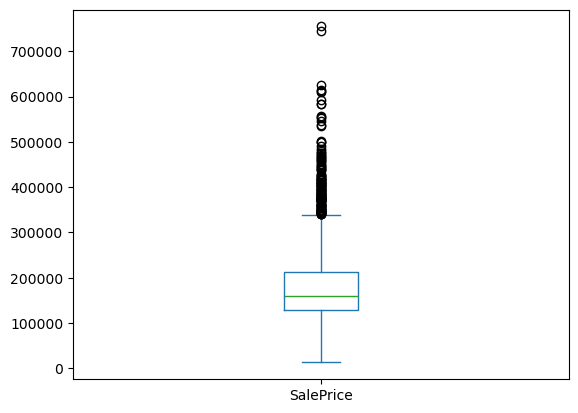

In [15]:
df["SalePrice"].plot(kind="box")

In [16]:
df["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
df["SalePrice"].skew()

1.7435000757376466

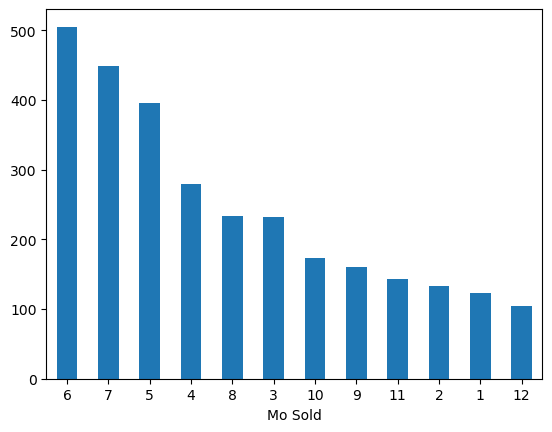

In [18]:
df["Mo Sold"].value_counts().plot(kind="bar")
plt.xticks(rotation=0);

<Axes: xlabel='Yr Sold'>

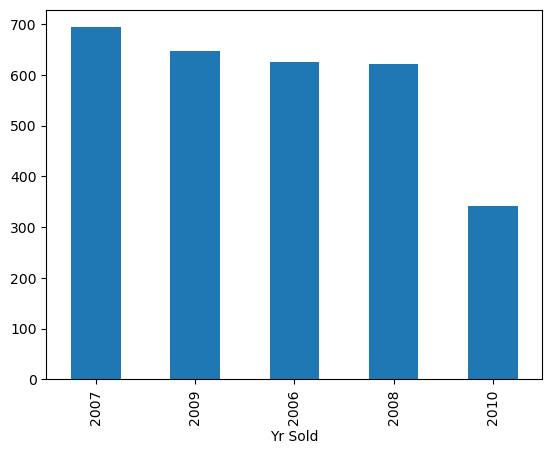

In [19]:
df["Yr Sold"].value_counts().plot(kind="bar")

<Axes: xlabel='Sale Type'>

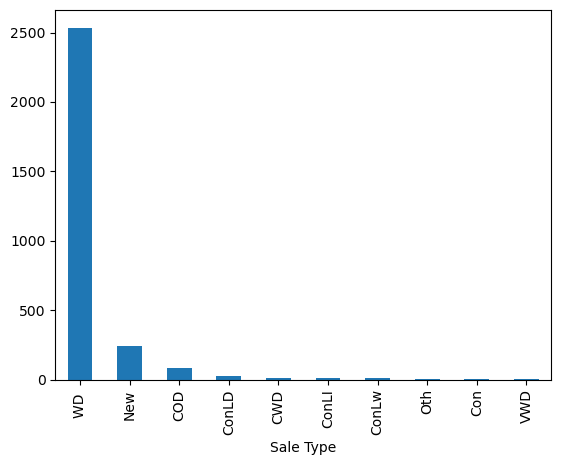

In [20]:
df["Sale Type"].value_counts().plot(kind="bar")

<Axes: xlabel='Yr Sold'>

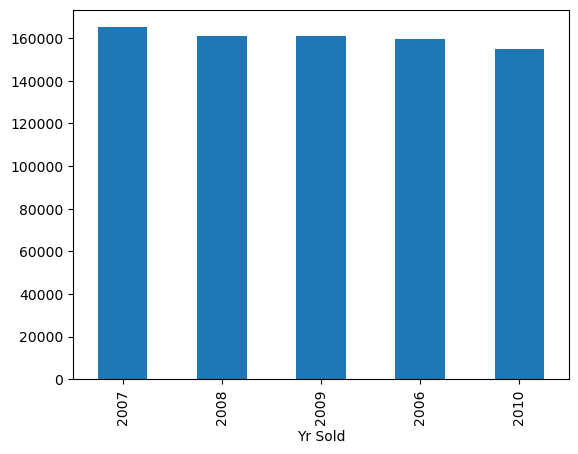

In [21]:
df.groupby("Yr Sold")["SalePrice"].median().sort_values(ascending=False).plot(kind="bar")

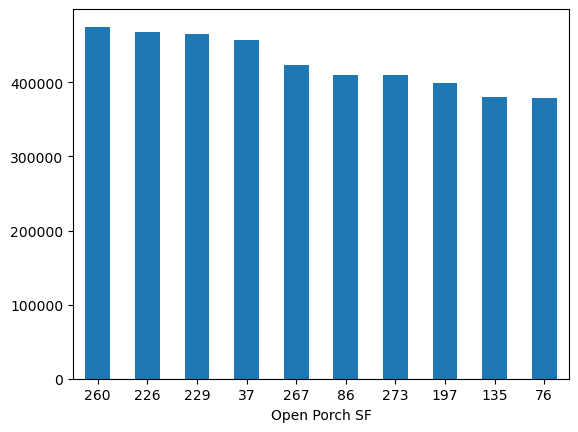

In [22]:
df.groupby("Open Porch SF")["SalePrice"].median().sort_values(ascending=False).head(10).plot(kind="bar")
plt.xticks(rotation=0);

<Axes: xlabel='Enclosed Porch'>

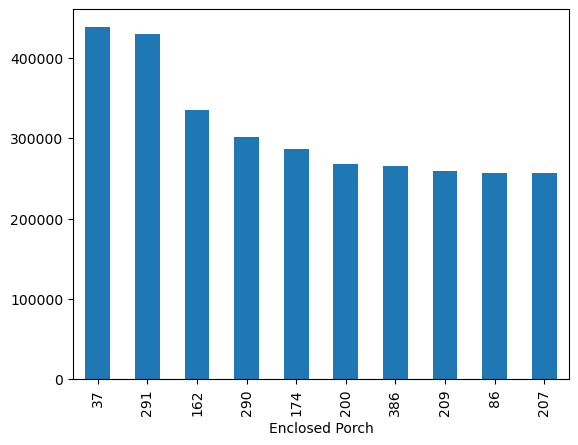

In [23]:
df.groupby(["Enclosed Porch"])["SalePrice"].median().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: xlabel='3Ssn Porch'>

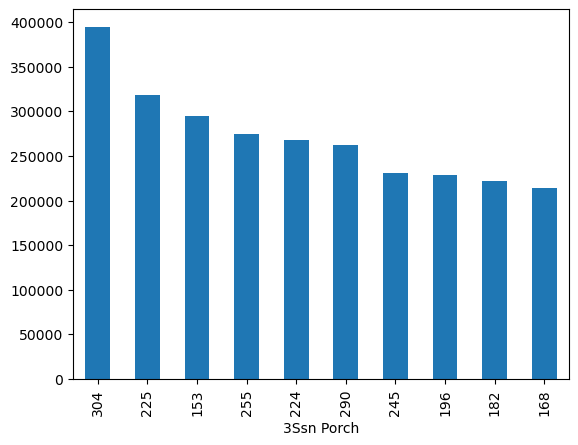

In [24]:
df.groupby("3Ssn Porch")["SalePrice"].median().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: xlabel='Screen Porch'>

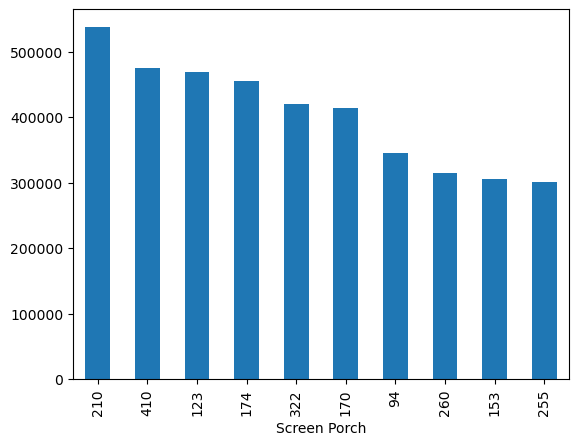

In [25]:
df.groupby("Screen Porch")["SalePrice"].median().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: xlabel='Garage Type'>

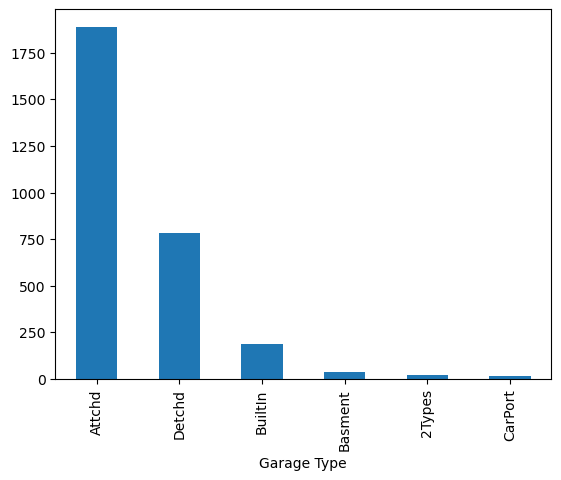

In [26]:
df["Garage Type"].value_counts().plot(kind="bar")

<Axes: xlabel='Paved Drive'>

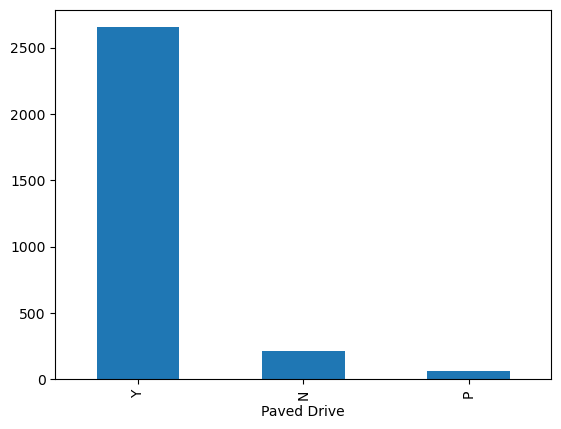

In [27]:
df["Paved Drive"].value_counts().plot(kind="bar")

<Axes: xlabel='Garage Cars'>

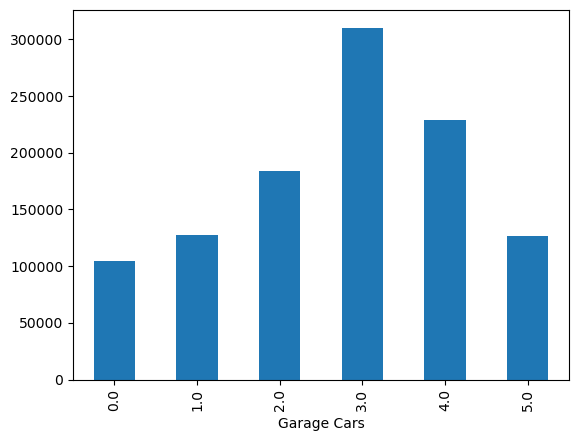

In [28]:
df.groupby("Garage Cars")["SalePrice"].mean().plot(kind="bar")

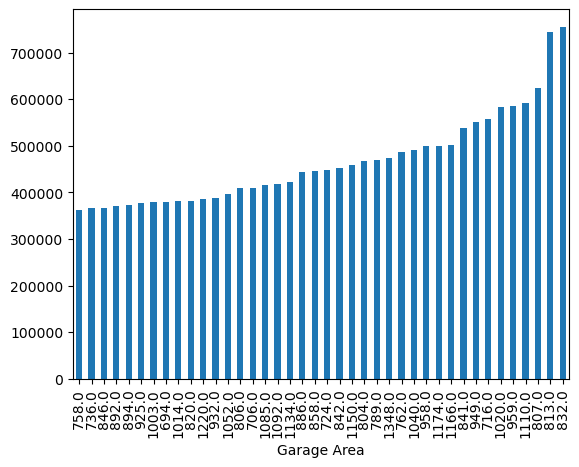

In [29]:
df.groupby("Garage Area")["SalePrice"].mean().sort_values().tail(40).plot(kind="bar")
plt.xticks(rotation=90);

In [30]:
df[["Garage Area", "SalePrice", "Garage Cars"]].corr()

,Garage Area,SalePrice,Garage Cars
Garage Area,1.000000,0.640381,0.889665
SalePrice,0.640381,1.000000,0.647812
Garage Cars,0.889665,0.647812,1.000000


<Axes: >

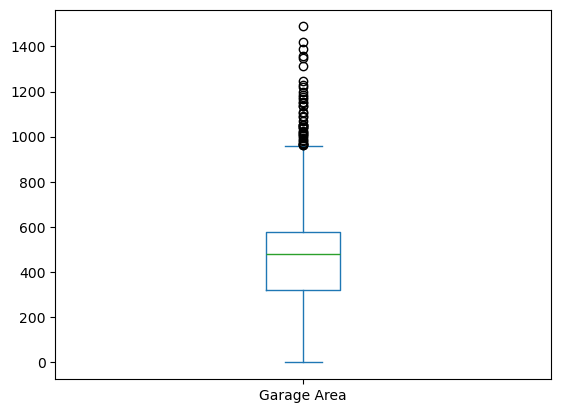

In [31]:
df["Garage Area"].plot(kind="box")

In [32]:
df["Garage Area"].describe()

count    2930.000000
mean      472.822184
std       215.009876
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: Garage Area, dtype: float64

In [45]:
df.groupby(["Overall Qual", "Overall Cond"]).size().unstack().reset_index().melt(id_vars="Overall Qual", value_name ="count")

,Overall Qual,Overall Cond,count
0,1,1,1.0
1,2,1,1.0
2,3,1,1.0
3,4,1,2.0
4,5,1,2.0
...,...,...,...
85,6,9,6.0
86,7,9,13.0
87,8,9,9.0
88,9,9,NaN


In [47]:
group = df.groupby(["Overall Qual", "Overall Cond"])["SalePrice"].mean()
group = group.reset_index()
group

,Overall Qual,Overall Cond,SalePrice
0,1,1,61000.000000
1,1,3,60400.000000
2,1,5,13100.000000
3,2,1,55000.000000
4,2,2,38344.500000
...,...,...,...
56,9,3,150000.000000
57,9,5,370167.638095
58,10,5,442919.178571
59,10,6,755000.000000


In [49]:
group["O_Q_C"] = group["Overall Qual"].astype(str) + "_" + group["Overall Cond"].astype(str)

In [51]:
group.drop(columns=["Overall Qual", "Overall Cond"], inplace=True)

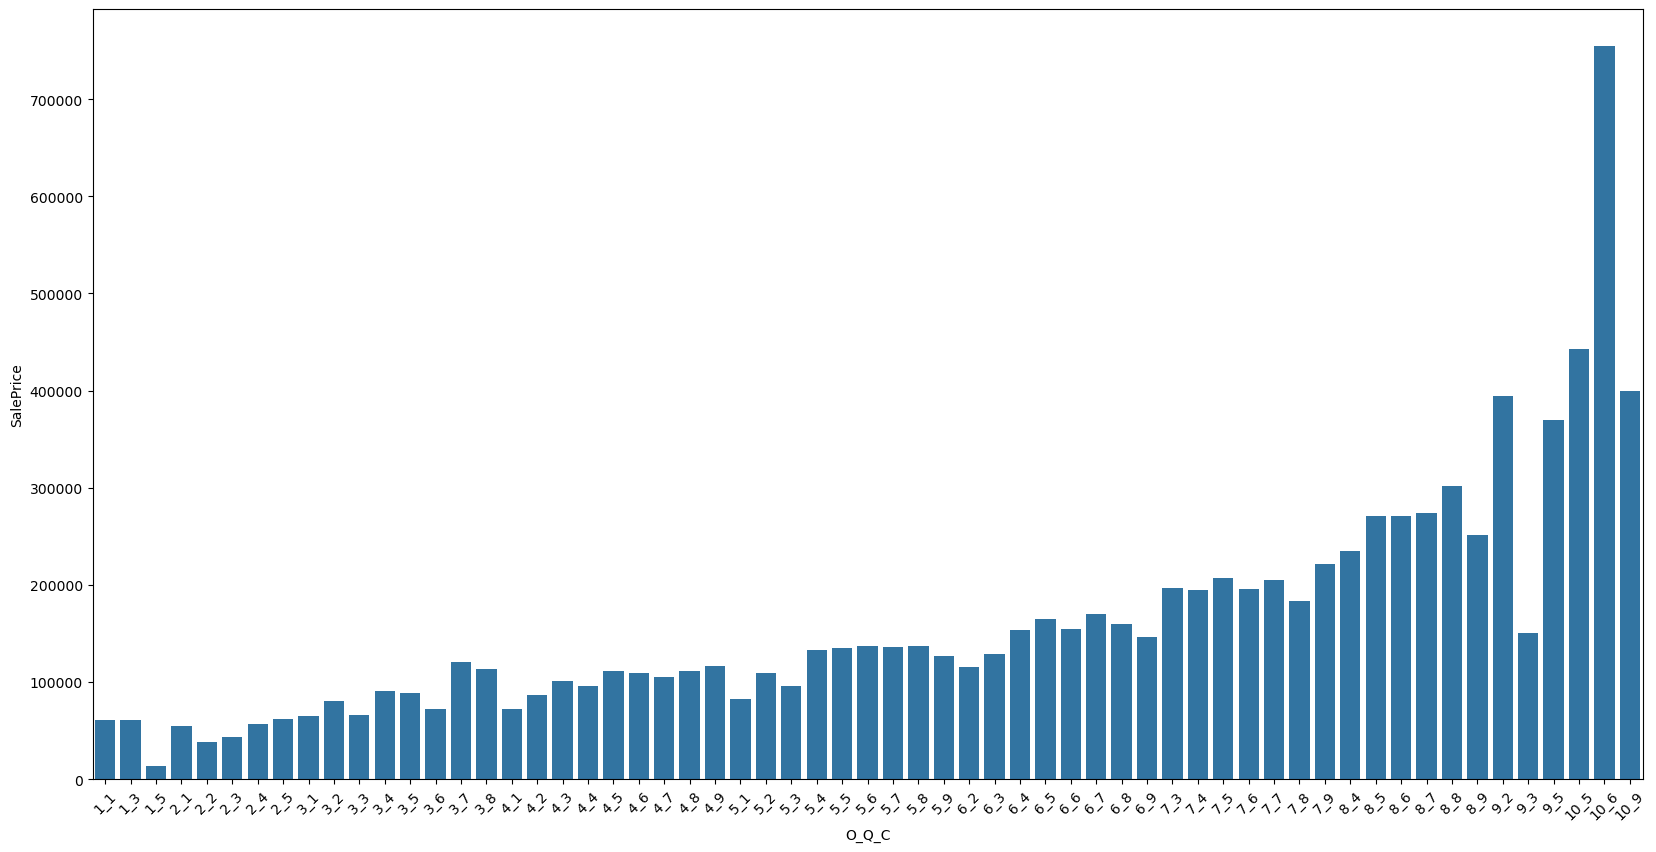

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(data=group, x="O_Q_C", y="SalePrice")
plt.xticks(rotation=45);

<Axes: >

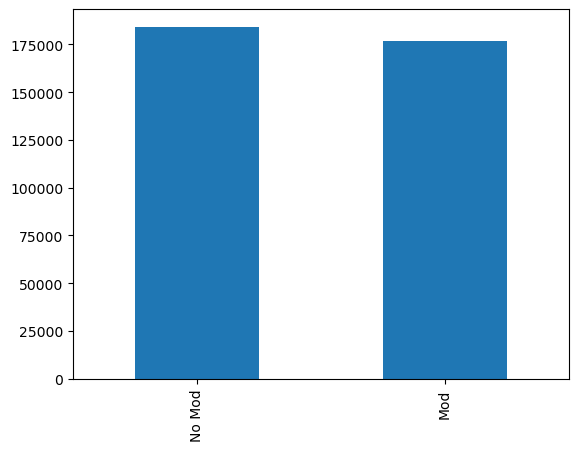

In [54]:
pd.Series({"No Mod":df[df["Year Built"] == df["Year Remod/Add"]]["SalePrice"].mean(), "Mod":df[df["Year Built"] != df["Year Remod/Add"]]["SalePrice"].mean()}).plot(kind="bar")



In [55]:
"""
Neighborhood: Physical locations within Ames city limits (e.g., CollgCr = College Creek, Veenker = Veenker).
Condition1: Proximity to main road or railroad (e.g., Norm = Normal, Feedr = Adjacent to feeder street).
Condition2: Proximity to main road or railroad (if a second is present).
BldgType: Type of dwelling (e.g., 1Fam = Single-family Detached).
HouseStyle: Style of dwelling (e.g., 2Story = Two story).
"""

'\nNeighborhood: Physical locations within Ames city limits (e.g., CollgCr = College Creek, Veenker = Veenker).\nCondition1: Proximity to main road or railroad (e.g., Norm = Normal, Feedr = Adjacent to feeder street).\nCondition2: Proximity to main road or railroad (if a second is present).\nBldgType: Type of dwelling (e.g., 1Fam = Single-family Detached).\nHouseStyle: Style of dwelling (e.g., 2Story = Two story).\n'

<Axes: xlabel='Neighborhood'>

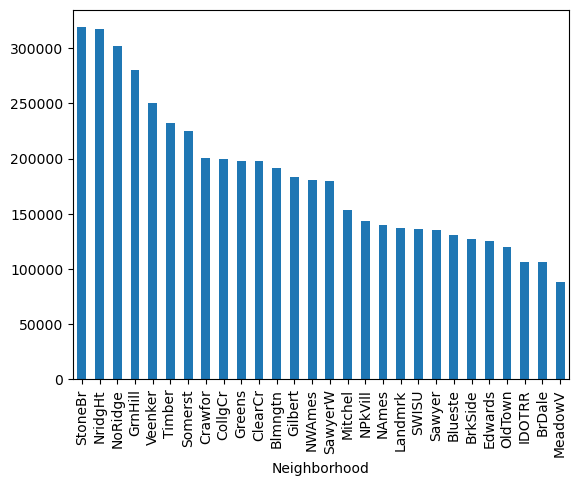

In [59]:
df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False).plot(kind="bar")

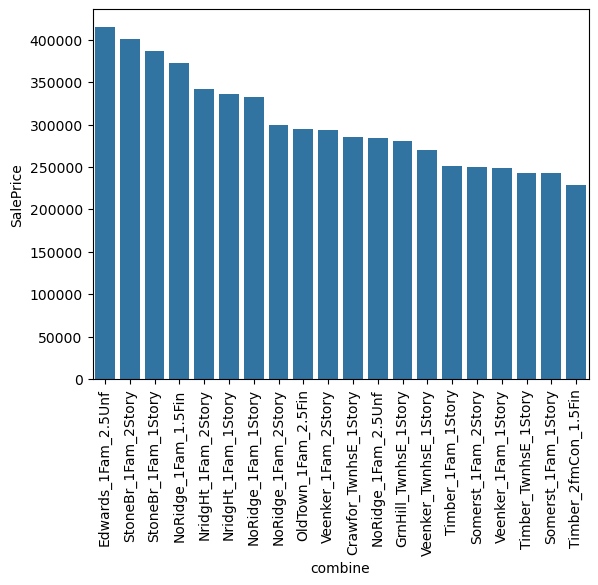

In [69]:
#plt.figure(figsize=(40,10))
neig_price = df.groupby(["Neighborhood", "Bldg Type", "House Style"])["SalePrice"].median().reset_index().sort_values(by="SalePrice", ascending=False)
neig_price["combine"] = neig_price["Neighborhood"] + "_" + neig_price["Bldg Type"] + "_" + neig_price["House Style"]	
sns.barplot(data=neig_price.head(20), x="combine", y="SalePrice")
plt.xticks(rotation=90);

In [133]:
#Condition1: Proximity to main road or railroad (e.g., Norm = Normal, Feedr = Adjacent to feeder street).
#Condition2: Proximity to main road or railroad (if a second is present).
cond1 = df["Condition 1"].value_counts().rename_axis("Street").reset_index(name="Count")
cond1["Type"] = "Cond1"
cond1

,Street,Count,Type
0,Norm,2522,Cond1
1,Feedr,164,Cond1
2,Artery,92,Cond1
3,RRAn,50,Cond1
4,PosN,39,Cond1
5,RRAe,28,Cond1
6,PosA,20,Cond1
7,RRNn,9,Cond1
8,RRNe,6,Cond1


In [135]:
cond2 = df["Condition 2"].value_counts().rename_axis("Street").reset_index(name="Count")
cond2["Type"] = "Cond2"
cond2

,Street,Count,Type
0,Norm,2900,Cond2
1,Feedr,13,Cond2
2,Artery,5,Cond2
3,PosA,4,Cond2
4,PosN,4,Cond2
5,RRNn,2,Cond2
6,RRAe,1,Cond2
7,RRAn,1,Cond2


In [137]:
build_cond = pd.concat([cond1, cond2])
build_cond

,Street,Count,Type
0,Norm,2522,Cond1
1,Feedr,164,Cond1
2,Artery,92,Cond1
3,RRAn,50,Cond1
4,PosN,39,Cond1
5,RRAe,28,Cond1
6,PosA,20,Cond1
7,RRNn,9,Cond1
8,RRNe,6,Cond1
0,Norm,2900,Cond2


<Axes: xlabel='Street', ylabel='Count'>

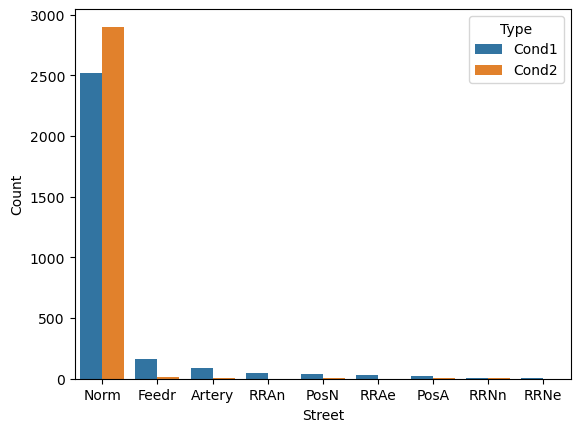

In [139]:
sns.barplot(data=build_cond, x="Street", y="Count", hue="Type")

In [153]:
conditional_price = df.groupby(["Condition 1", "Condition 2"])["SalePrice"].median().reset_index().sort_values(by="SalePrice", ascending=False)

In [157]:
conditional_price["combined_condition"] = conditional_price["Condition 1"] + "_" + conditional_price["Condition 1"]

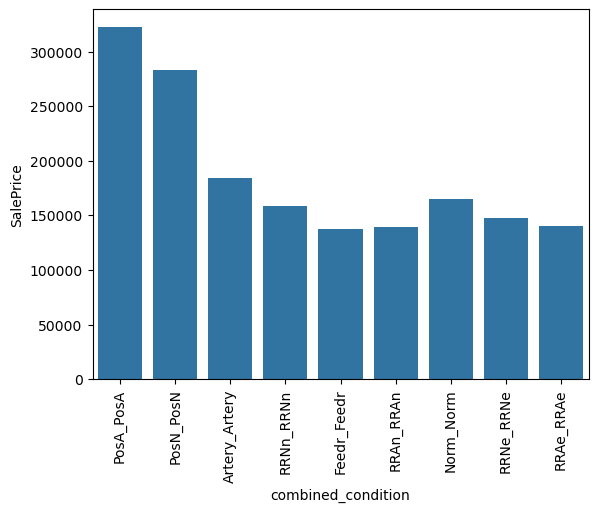

In [167]:
sns.barplot(data=conditional_price, x="combined_condition", y="SalePrice", errorbar=None)
plt.xticks(rotation=90);

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built       29

In [179]:
df["Bsmt Qual"].value_counts().corr(df["Bsmt Cond"].value_counts()) 

0.6870917498253909

In [243]:
df = df[["MS Zoning", "Neighborhood", "House Style", "Year Built", "Year Remod/Add", "Fireplaces", "Full Bath", "Half Bath", "Heating", "Total Bsmt SF",  "Pool Area", "SalePrice"]]

In [245]:
X = df[df.columns[:len(df.columns)-1]]
y = df[df.columns[-1:]]

In [261]:
cat = X.select_dtypes(include="object").columns.tolist()

In [263]:
num = X.select_dtypes(include=["int", "float"]).columns.tolist()

In [265]:
transformer = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(), cat), 
    ("num", StandardScaler(), num)
])

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [269]:
pipeline_linereg = make_pipeline(transformer, LinearRegression())
pipeline_linereg.fit(X_train, y_train)
pred_y_linreg = pipeline_linereg.predict(X_test)

In [277]:
print(mean_absolute_error(y_test, pred_y_linreg))
print(mean_squared_error(y_test, pred_y_linreg))
print(r2_score(y_test, pred_y_linreg))

26847.417207334864
1920452179.478834
0.7299097321971375


In [287]:
pipeline_destree = make_pipeline(transformer, DecisionTreeRegressor())
pipeline_destree.fit(X_train, y_train)
pred_y_destree = pipeline_destree.predict(X_test)

In [289]:
print(mean_absolute_error(y_test, pred_y_destree))
print(mean_squared_error(y_test, pred_y_destree))
print(r2_score(y_test, pred_y_destree))

28662.192263936286
2062305127.8473854
0.7099596906273


In [291]:
pipeline_ranstree = make_pipeline(transformer, RandomForestRegressor())
pipeline_ranstree.fit(X_train, y_train)
pred_y_rantree = pipeline_ranstree.predict(X_test)

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [293]:
print(mean_absolute_error(y_test, pred_y_rantree))
print(mean_squared_error(y_test, pred_y_rantree))
print(r2_score(y_test, pred_y_rantree))

21573.896333435525
1113292500.001379
0.8434277756658898


In [295]:
pipeline_xgbreg = make_pipeline(transformer, XGBRegressor())
pipeline_xgbreg.fit(X_train, y_train)
pred_y_xgbreg = pipeline_xgbreg.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

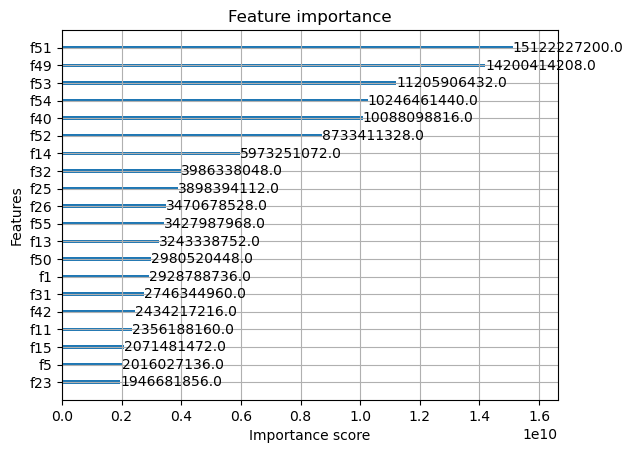

In [327]:
xgb_model = pipeline_xgbreg.named_steps["xgbregressor"]
xgb.plot_importance(xgb_model, max_num_features=20, importance_type='gain')

In [297]:
print(mean_absolute_error(y_test, pred_y_xgbreg))
print(mean_squared_error(y_test, pred_y_xgbreg))
print(r2_score(y_test, pred_y_xgbreg))

21160.783203125
943448960.0
0.867314338684082


In [303]:
pipeline_linSVR = make_pipeline(transformer, LinearSVR())
pipeline_linSVR.fit(X_train, y_train)
pred_y_linSVR = pipeline_linSVR.predict(X_test)

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [305]:
print(mean_absolute_error(y_test, pred_y_linSVR))
print(mean_squared_error(y_test, pred_y_linSVR))
print(r2_score(y_test, pred_y_linSVR))

181140.47269624574
39894409567.77986
-4.610705582329499


In [311]:
pipeline_SVR = make_pipeline(transformer, SVR())
pipeline_SVR.fit(X_train, y_train)
pred_y_SVR = pipeline_SVR.predict(X_test)

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [313]:
print(mean_absolute_error(y_test, pred_y_SVR))
print(mean_squared_error(y_test, pred_y_SVR))
print(r2_score(y_test, pred_y_SVR))

58632.991920996086
7888462816.032683
-0.10942467472081763
